# Project: Sharktale, SharkTrack

In [ ]:
!pip install xlrd #!pip install country_converter, keep this here pls

### Imports Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [ ]:
#define path to xls
url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
df = pd.read_excel(url)

## The Data at a Glance:

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.tail()

In [ ]:
df.shape[0]
df.shape[1]

print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

df.columns
# Issues w/ og file –> extra 8 columns on VSC? to preserve NaN
# Date, Year, Type, Country, State, Location, Activity, Name, Sex, Age, Injury, Fatal Y/N, Time, Specie, Source
# check search tool between uppercase and lowercase e.g. Australia / AUSTRALIA

In [29]:
df.describe()

,Year,Age,original order
count,6992.000000,6994.000000,6799.000000
mean,1935.044336,28.104841,3401.152081
std,272.048128,10.833771,1963.076319
min,0.000000,1.000000,2.000000
25%,1947.000000,22.000000,1701.500000
50%,1986.000000,28.104841,3401.000000
75%,2009.000000,28.104841,5100.500000
max,2026.000000,87.000000,6802.000000


In [30]:
df.rename(columns= {
    'Fatal Y/N': 'Fatal',
    'Species ': 'Species',
    'pdf': 'PDF', 
    'Sex': 'Gender',
    'href formula': 'Href_formula', 
    'href': 'Href',
    'Case Number': 'Case_Number', 
    'Case Number.1': 'Case_Number_1',
    'original order': 'Original_Order', 
    'Unnamed: 21': 'Unnamed_21', 
    'Unnamed: 22': 'Unnamed_22'
}, inplace=True)
print(df.columns)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Gender', 'Age', 'Injury', 'Fatal', 'Time', 'Species', 'Source',
       'PDF', 'Href_formula', 'Href', 'Case_Number', 'Case_Number_1',
       'Original_Order', 'Unnamed_21', 'Unnamed_22', 'Cleaned_Activity'],
      dtype='object')


In [31]:
df["Href_formula"].equals(df["Href"]) # Checking if its the same 

False

In [32]:
df["Href_formula"].isin(df["Href"]).value_counts() # There is less than 10% difference between the columns. I am keeping Href

Href_formula
True     6900
False      94
Name: count, dtype: int64

In [33]:
# Dropping Columns
df = df.drop(columns=["Unnamed_21", "PDF", "Unnamed_22", "Href_formula", "Case_Number", "Case_Number_1"])
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Gender,Age,Injury,Fatal,Time,Species,Source,Href,Original_Order,Cleaned_Activity
0,2025-02-07 00:00:00,2025.0,Unprovoked,Turks and Caicos,NaN,Thompson Cove Beach,Swimming,Unknown,F,55.0,Unknown,N,Unknown,Unknown,Todd Smith: Platform X,NaN,NaN,Swimming
1,2025-02-03 00:00:00,2025.0,Unprovoked,Australia,Queensland,"Woorim Beach, Bribie Island,",Swimming,Charlize Zmuda,F,17.0,Bites to arm and upper body,Y,1645 hrs,Bull shark,9 News: The Brisbane Times: The Guardian,NaN,NaN,Swimming
2,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12.0,Minor bite to lower body,N,1711hrs,Not stated,Bob Myatt GSAF,NaN,NaN,Bathing
3,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37.0,None - chunk of surfboard bitten out,N,1600hrs,Bronze whaler,Bob Myatt GSAF,NaN,NaN,Surfing
4,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23.0,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,Diving


In [34]:
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Gender,Age,Injury,Fatal,Time,Species,Source,Href,Original_Order,Cleaned_Activity
0,2025-02-07 00:00:00,2025.0,Unprovoked,Turks and Caicos,NaN,Thompson Cove Beach,Swimming,Unknown,F,55.0,Unknown,N,Unknown,Unknown,Todd Smith: Platform X,NaN,NaN,Swimming
1,2025-02-03 00:00:00,2025.0,Unprovoked,Australia,Queensland,"Woorim Beach, Bribie Island,",Swimming,Charlize Zmuda,F,17.0,Bites to arm and upper body,Y,1645 hrs,Bull shark,9 News: The Brisbane Times: The Guardian,NaN,NaN,Swimming
2,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12.0,Minor bite to lower body,N,1711hrs,Not stated,Bob Myatt GSAF,NaN,NaN,Bathing
3,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37.0,None - chunk of surfboard bitten out,N,1600hrs,Bronze whaler,Bob Myatt GSAF,NaN,NaN,Surfing
4,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23.0,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,Diving


In [ ]:
# Here I am trying to identify the number of unique values for each column and determine which columns appear to be categorical. 
unique_counts = df.nunique() # Identify the number of unique values for each column
print("\nUnique value counts per column: ")
print(unique_counts)

In [ ]:
#Checking for null values in each column 
df.isna().any()

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.duplicated().any()

In [ ]:
#Count the number of null values in each column
df.isna().sum()

### Data Cleaning for the Column 'Type' 

In [ ]:
df.Type.unique()

In [ ]:
print(df["Type"].value_counts()) 

In [ ]:
print(df["Type"].value_counts(dropna=False)) # I wanted to review the Nan 

In [ ]:
#df_nan = df[df["Type"].isna()]
#df_nan
#3df["Type"] = df["Type"].isnull().sum

In [ ]:
#Reviewing how many were provoked and unprovoked 
print(df["Type"].unique())
# What is the meaning in here as "Provoked"?? 

In [ ]:
df["Type"] = df["Type"].str.strip()
df["Type"] = df["Type"].replace({
    " Provoked": "Provoked", 
    "Unconfirmed": "Unknown",
    "?" : "Unknown",
    "Invalid": "Unknown",
    "Under investigation": "Unknown",
    "Questionable": "Unknown", 
    "Watercraft" : "Water Vehicle", 
    "Boat" : "Water Vehicle"
})

df["Type"] = df["Type"].fillna("Unknown")
print(df["Type"].unique())

### Data Cleaning for the Column 'Gender'

In [ ]:
df["Gender"] = df["Gender"].replace({
    " M": "M", 
    "M ": "M", 
    "M x 2": "M", 
    " nan": "Unknown", 
    "lli": "Unknown", 
    "N": "M", 
    ".": "Unknown"
    })
df["Gender"] = df["Gender"].fillna("Unknown")
df.Gender.unique()

#### Visualisation: Gender of Victims

In [ ]:
# Piechart to see the distribution between "M", "F". 
df[df["Gender"].isin(["M", "F", "Unknown"])]["Gender"].value_counts().plot(kind="pie", title= "Gender of the Victim", autopct="%1.1f%%", colors=["skyblue", "dodgerblue", "deepskyblue"], table=True)

In [ ]:
country_gender = df.groupby(["Gender", "Country"]).size().to_frame("count").reset_index()
country_gender

### Data Cleaning for the Column 'Species'

In [ ]:
df["Species"].unique()
print(df["Species"].unique()[:600])

In [ ]:
# Cleaning the Column 'Species' a bit 
df["Species"] = df["Species"].str.extract(r'([A-Za-z\s-]+)').fillna("Unknown") # Cleaning here the unnecessary details
df["Species"] = df["Species"].replace({
    "Not stated":"Unknown"
})
print(df["Species"])

In [ ]:
df["Species_Types"] = df["Species"].copy() # creating a copy of species and naming it Species_Types

In [ ]:
df["Species_Types"] = df["Species_Types"].fillna("Unknown").astype(str)

In [ ]:
df["Species_Types"] = df["Species_Types"].replace({
    "Not stated": "Unknown",
    "Not specified": "Unknown",
    "Invalid": "Unknown",
    "Great White Shark": "White Shark"   
}) 

In [ ]:
#Data Cleanining for the Column 'Species'
#df["Species"].unique() df["Species"] = df["Species"]
#df["Species"]
#df.Species.unique()

def clean_shark_name(species): 
    species = species.strip().lower()

    match = re.search(r"(?:\b\w+\s+)*?(great white|horn|white|tiger|bull|Bull|hammerhead|hammer|Hammerhead|blacktip|whale|nurse|mako|reef|Reef)(?:\s+\w+)*?\s*shark(?:\s+\w+)*?", species)
    #match = re.search(r"(great white|white|tiger|bull|hammerhead|blacktip|whale|nurse|mako|reef)s*shark", species)

    if match:
        #return match.group(0).title()
        return match.group(1).title() + " Shark"
    else: 
        return "Other/Unknown"

df["Species_Types"] = df["Species_Types"].apply(clean_shark_name)

print(df["Species_Types"].value_counts())  # Check unique values
print(df["Species_Types"].tail())  # Display first few rows
#print(df_Species.nunique()) 
#print(df_Species.unique()[:100])

In [ ]:
#df.dtypes
df["Species_Types"].value_counts()

In [ ]:
df["Species_Types"] = df["Species_Types"].str.strip()

In [ ]:
print(df["Species_Types"].value_counts())

#### Visualisation for Species Types

In [ ]:
species_types_group = df.groupby("Species_Types")
shark_attack_by_species_types = species_types_group["Species_Types"].count()
shark_attack_by_species_types = shark_attack_by_species_types.sort_values(ascending=False)
top_species_types_attack = shark_attack_by_species_types.head(15)
top_species_types_attack

In [ ]:
plt.figure(figsize=(15,2))
sns.barplot(x=top_species_types_attack.index, y=top_species_types_attack, color="skyblue")
plt.title("Number of Attacks by Species Types")
plt.ylabel("Number of Attacks")
plt.show()

In [ ]:
# This can be ignored, but can be usable for in the future
#Group_Species = df.groupby("Species")

#for species, group in Group_Species:
#    print(f"Group name: {species}")
#   # display(group)
#df["Species"].nunique() == len(Grouped_Species)

In [ ]:
#df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

### Data Cleaning for the 'Country' Column

In [56]:
df["Country"].unique()

array(['Turks And Caicos', 'Australia', 'United States', 'New Caledonia',
       'Egypt', 'Thailand', 'New Zealand', 'Maldives', 'Hawaii',
       'Honduras', 'Morocco', 'Jamaica', 'Belize', 'Maldive Islands',
       'French Polynesia', 'Tobago', 'Bahamas', 'India', 'Trinidad',
       'South Africa', 'Mexico', 'Philippines', 'Coral Sea', 'Spain',
       'Portugal', 'Samoa', 'Colombia', 'Ecuador', 'Cuba', 'Brazil',
       'Seychelles', 'Argentina', 'Fiji', 'England', 'Japan', 'Indonesia',
       'Columbia', 'Costa Rica', 'British Overseas Territory', 'Canada',
       'Jordan', 'St Kitts  Nevis', 'St Martin', 'Papua New Guinea',
       'Reunion Island', 'Israel', 'China', 'Ireland', 'Italy',
       'Malaysia', 'Libya', 'Unknown', 'Mauritius', 'Solomon Islands',
       'St Helena British Overseas Territory', 'Comoros', 'Reunion',
       'United Kingdom', 'United Arab Emirates', 'Cape Verde',
       'Dominican Republic', 'Cayman Islands', 'Aruba', 'Mozambique',
       'Puerto Rico', 'Atlant

In [58]:
len(df["Country"].unique())

208

In [62]:
update_country = {
    'AUSTRALIA': 'Australia',
    'BAHAMAS': 'Bahamas',
    'BELIZE': 'Belize',
    'COLOMBIA': 'Colombia',
    'COLUMBIA': 'Colombia',
    'EGYPT': 'Egypt',
    'ENGLAND': 'United Kingdom',
    'FRENCH POLYNESIA': 'French Polynesia',
    'INDIA': 'India',
    'INDONESIA': 'Indonesia',
    'JAMAICA': 'Jamaica',
    'JAPAN': 'Japan',
    'MALDIVE ISLANDS': 'Maldives',
    'MALDIVES': 'Maldives',
    'MEXICO': 'Mexico',
    'MeXICO': 'Mexico',
    'MEXICO ': 'Mexico',
    'NEW CALEDONIA': 'New Caledonia',
    'NEW ZEALAND': 'New Zealand',
    'PHILIPPINES': 'Philippines',
    'SPAIN': 'Spain',
    'SOUTH AFRICA': 'South Africa',
    'South Africa': 'South Africa',
    'THAILAND': 'Thailand',
    'TRINIDAD': 'Trinidad and Tobago',
    'TRINIDAD & TOBAGO': 'Trinidad and Tobago',
    'TURKS & CAICOS': 'Turks and Caicos',
    'TURKS and CaICOS': 'Turks and Caicos',
    'UNITED ARAB EMIRATES (UAE)': 'United Arab Emirates',
    'UNITED KINGDOM': 'United Kingdom',
    'USA': 'United States',
    'UAE': 'United Arab Emirates',
    'UNITED STATES': 'United States',
    'REUNION ISLAND': 'Reunion',
    'REUNION': 'Reunion',
    'ST MARTIN': 'Saint Martin',
    'ST. MARTIN': 'Saint Martin',
    'ST. MAARTIN': 'Saint Martin',
    'SAINT MAARTEN': 'Saint Martin',
    'PAPUA NEW GUINEA': 'Papua New Guinea',
    'FIJI': 'Fiji',
    'Fiji': 'Fiji',
    'CANADA': 'Canada',
    'CUBA': 'Cuba',
    'ARGENTINA': 'Argentina',
    'BRAZIL': 'Brazil',
    'CHILE': 'Chile',
    'ECUADOR': 'Ecuador',
    'PERU': 'Peru',
    'VENEZUELA': 'Venezuela',
    'COOK ISLANDS': 'Cook Islands',
    'DOMINICAN REPUBLIC': 'Dominican Republic',
    'SEYCHELLES': 'Seychelles',
    'ST KITTS / NEVIS': 'Saint Kitts and Nevis',
    'ST HELENA, British overseas territory': 'Saint Helena',
    'SOLOMON ISLANDS': 'Solomon Islands',
    'TONGA': 'Tonga',
    ' TONGA': 'Tonga',
    'KIRIBATI': 'Kiribati',
    'PALAU': 'Palau',
    'MALTA': 'Malta',
    'SCOTLAND': 'United Kingdom',
    'IRELAND': 'Ireland',
    'ITALY': 'Italy',
    'MALAYSIA': 'Malaysia',
    'LIBYA': 'Libya',
    'JORDAN': 'Jordan',
    'ISRAEL': 'Israel',
    'CHINA': 'China',
    'TAIWAN': 'Taiwan',
    'INDIAN OCEAN': 'Indian Ocean',
    'INDIAN OCEAN?': 'Indian Ocean',
    'INDIAN OCEAN?': 'Indian Ocean',
    'NORTH ATLANTIC OCEAN': 'North Atlantic Ocean',
    'NORTH ATLANTIC OCEAN ': 'North Atlantic Ocean',
    'SOUTH ATLANTIC OCEAN': 'South Atlantic Ocean',
    'ATLANTIC OCEAN': 'Atlantic Ocean',
    'PACIFIC OCEAN': 'Pacific Ocean',
    'PACIFIC OCEAN ': 'Pacific Ocean',
    'SOUTH PACIFIC OCEAN': 'South Pacific Ocean',
    'NORTH PACIFIC OCEAN': 'North Pacific Ocean',
    'CARIBBEAN SEA': 'Caribbean Sea',
    'MID ATLANTIC OCEAN': 'Mid Atlantic Ocean',
    'SOUTH CHINA SEA': 'South China Sea',
    'BAY OF BENGAL': 'Bay of Bengal',
    'RED SEA': 'Red Sea',
    'RED SEA?': 'Red Sea',
    'RED SEA / INDIAN OCEAN': 'Red Sea',
    'GULF OF ADEN': 'Gulf of Aden',
    'PERSIAN GULF': 'Persian Gulf',
    'CEYLON': 'Sri Lanka',
    'CEYLON (SRI LANKA)': 'Sri Lanka',
    'SRI LANKA': 'Sri Lanka',
    'BANGLADESH': 'Bangladesh',
    'BURMA': 'Myanmar',
    'MYANMAR': 'Myanmar',
    'VIETNAM': 'Vietnam',
    'HONG KONG': 'Hong Kong',
    'MARTINIQUE': 'Martinique',
    'NETHERLANDS ANTILLES': 'Netherlands Antilles',
    'NORTHERN MARIANA ISLANDS': 'Northern Mariana Islands',
    'FEDERATED STATES OF MICRONESIA': 'Micronesia',
    'MICRONESIA': 'Micronesia',
    'FALKLAND ISLANDS': 'Falkland Islands',
    'GIBRALTAR': 'Gibraltar',
    'SAUDI ARABIA': 'Saudi Arabia',
    'SINGAPORE': 'Singapore',
    'SENEGAL': 'Senegal',
    'SOMALIA': 'Somalia',
    'SOUTH KOREA': 'South Korea',
    'NORTH KOREA': 'North Korea',
    'RUSSIA': 'Russia',
    'GREECE': 'Greece',
    'TUNISIA': 'Tunisia',
    'TURKEY': 'Turkey',
    'IRAN': 'Iran',
    'IRAQ': 'Iraq',
    'KUWAIT': 'Kuwait',
    'LEBANON': 'Lebanon',
    'SYRIA': 'Syria',
    'AFRICA': 'Africa',
    'Coast of AFRICA': 'Africa',
    'GEORGIA': 'Georgia',
    'GHANA': 'Ghana',
    'GUINEA': 'Guinea',
    'NAMIBIA': 'Namibia',
    'TANZANIA': 'Tanzania',
    'ALGERIA': 'Algeria',
    'DJIBOUTI': 'Djibouti',
    'EQUATORIAL GUINEA / CAMEROON': 'Equatorial Guinea',
    'WEST INDIES': 'Caribbean',
    'BRITISH ISLES': 'United Kingdom',
    'BRITISH WEST INDIES': 'Caribbean',
    'ST HELENA, British overseas territory': 'Saint Helena',
    'NORWAY': 'Norway',
    'ICELAND': 'Iceland',
    'GABON': 'Gabon',
    'MAYOTTE': 'Mayotte',
    'SWEDEN': 'Sweden',
    'SLOVENIA': 'Slovenia',
    'CURACAO': 'Curaçao',
    'HAITI': 'Haiti',
    'GUATEMALA': 'Guatemala',
    'NICARAGUA': 'Nicaragua',
    'NICARAGUA ': 'Nicaragua',
    'HONDURAS': 'Honduras',
    'EL SALVADOR': 'El Salvador',
    'COSTA RICA': 'Costa Rica',
    'PANAMA': 'Panama',
    'BARBADOS': 'Barbados',
    'ARUBA': 'Aruba',
    'GRAND CAYMAN': 'Cayman Islands',
    'CAYMAN ISLANDS': 'Cayman Islands',
    'SAINT LUCIA': 'Saint Lucia',
    'USA': 'United States', 
    'Usa': 'United States'
}

In [63]:
df['Country'] = df['Country'].replace(update_country).fillna('Unknown')

In [64]:
df['Country'].unique()

array(['Turks And Caicos', 'Australia', 'United States', 'New Caledonia',
       'Egypt', 'Thailand', 'New Zealand', 'Maldives', 'Hawaii',
       'Honduras', 'Morocco', 'Jamaica', 'Belize', 'Maldive Islands',
       'French Polynesia', 'Tobago', 'Bahamas', 'India', 'Trinidad',
       'South Africa', 'Mexico', 'Philippines', 'Coral Sea', 'Spain',
       'Portugal', 'Samoa', 'Colombia', 'Ecuador', 'Cuba', 'Brazil',
       'Seychelles', 'Argentina', 'Fiji', 'England', 'Japan', 'Indonesia',
       'Columbia', 'Costa Rica', 'British Overseas Territory', 'Canada',
       'Jordan', 'St Kitts  Nevis', 'St Martin', 'Papua New Guinea',
       'Reunion Island', 'Israel', 'China', 'Ireland', 'Italy',
       'Malaysia', 'Libya', 'Unknown', 'Mauritius', 'Solomon Islands',
       'St Helena British Overseas Territory', 'Comoros', 'Reunion',
       'United Kingdom', 'United Arab Emirates', 'Cape Verde',
       'Dominican Republic', 'Cayman Islands', 'Aruba', 'Mozambique',
       'Puerto Rico', 'Atlant

In [73]:
 #Data Cleaning for the column 'Country', I've tried to use regex 
df["Country"] = df["Country"].str.strip().str.title()
df["Country"] = df["Country"].str.replace(r"[^a-zA-Z\s]", "", regex=True)
#df["Country"] = df["Country"].map(lambda x: x.upper())
df["Country"] = df["Country"].fillna("Unknown")
print(df["Country"].unique())

['Turks And Caicos' 'Australia' 'United States' 'New Caledonia' 'Egypt'
 'Thailand' 'New Zealand' 'Maldives' 'Hawaii' 'Honduras' 'Morocco'
 'Jamaica' 'Belize' 'French Polynesia' 'Tobago' 'Bahamas' 'India'
 'Trinidad And Tobago' 'South Africa' 'Mexico' 'Philippines' 'Coral Sea'
 'Spain' 'Portugal' 'Samoa' 'Colombia' 'Ecuador' 'Cuba' 'Brazil'
 'Seychelles' 'Argentina' 'Fiji' 'United Kingdom' 'Japan' 'Indonesia'
 'Costa Rica' 'British Overseas Territory' 'Canada' 'Jordan'
 'St Kitts  Nevis' 'Saint Martin' 'Papua New Guinea' 'Reunion' 'Israel'
 'China' 'Ireland' 'Italy' 'Malaysia' 'Libya' 'Unknown' 'Mauritius'
 'Solomon Islands' 'St Helena British Overseas Territory' 'Comoros'
 'United Arab Emirates' 'Cape Verde' 'Dominican Republic' 'Cayman Islands'
 'Aruba' 'Mozambique' 'Puerto Rico' 'Atlantic Ocean' 'Greece' 'France'
 'Trinidad  Tobago' 'Kiribati' 'Diego Garcia' 'Taiwan'
 'Palestinian Territories' 'Guam' 'Nigeria' 'Tonga' 'Croatia'
 'Saudi Arabia' 'Chile' 'Antigua' 'Kenya' 'Russia' 'Tur

In [74]:
unique_country = len(df['Country'].unique())
unique_country

198

In [75]:
df["Country"] = df["Country"].replace(update_country) # Reassigning it back to "Country"

In [76]:
country_group = df.groupby('Country')
number_of_attacks = country_group['Country'].count()
number_of_attacks = number_of_attacks.sort_values(ascending=False)
top_10_attacks = number_of_attacks.head(10)
top_10_attacks

Country
United States       2556
Australia           1494
South Africa         598
New Zealand          146
Bahamas              137
Papua New Guinea     136
Brazil               122
Mexico               106
Italy                 72
Fiji                  70
Name: Country, dtype: int64

#### Visuallisation of Top 10 Countries of Shark Attacks

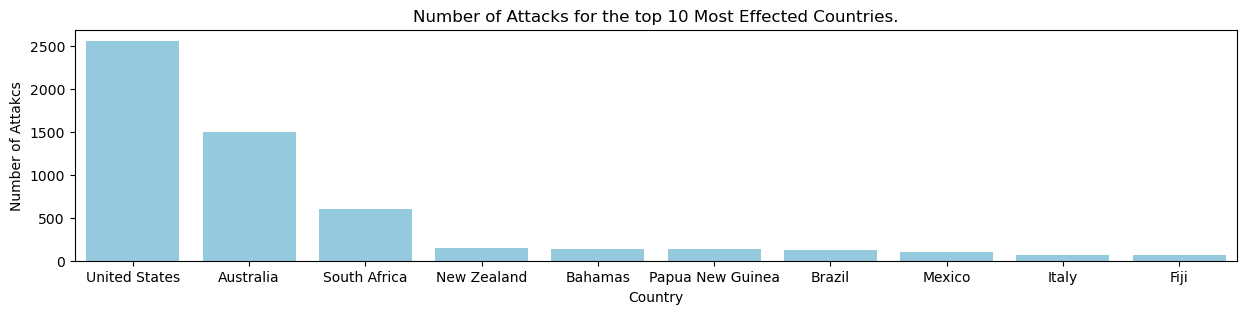

In [77]:
plt.figure(figsize=(15,3))
sns.barplot(x=top_10_attacks.index, y=top_10_attacks, color="skyblue")
plt.title("Number of Attacks for the top 10 Most Effected Countries.")
plt.ylabel("Number of Attakcs")
plt.show()

#### Visualisation: Gender Distribution of Victims of Shark Attacks.

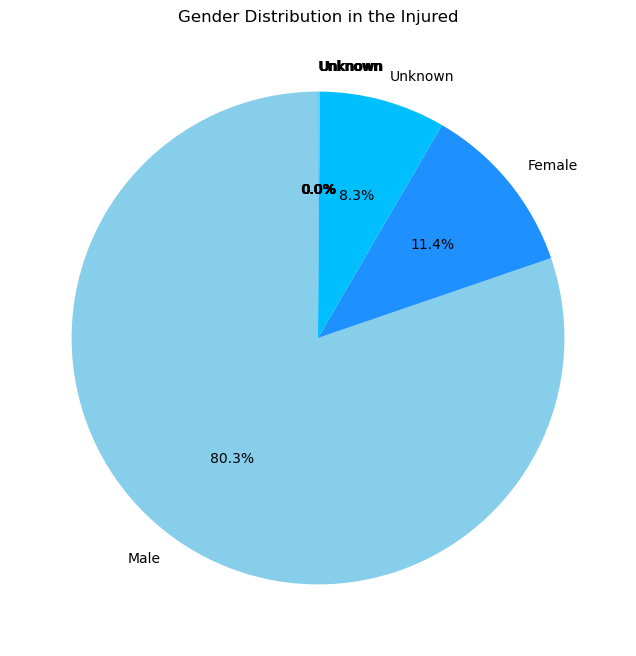

In [81]:
#df["Gender"] = df["Gender"].fillna("Unknown")  # Replace NaN with "Unknown"

gender_group = df.groupby("Gender")
gender_country_group = gender_group["Country"].count()
gender_of_injured = gender_country_group.sort_values(ascending=False)
gender_of_injured.index = gender_of_injured.index.map({"M": "Male", "F": "Female"}).fillna("Unknown")  # Map known values and keep "Unknown"

plt.figure(figsize=(8, 8))
plt.pie(gender_of_injured, labels=gender_of_injured.index, autopct="%1.1f%%", startangle=90, colors=["skyblue", "dodgerblue", "deepskyblue"])
plt.title("Gender Distribution in the Injured")
plt.show()

### Data Cleaning for the Column 'Location'

In [ ]:
# Cleaning for location
df["Location"] = df["Location"].astype(str)
df["Location"] = df["Location"].map(lambda x:x.upper())
df["Location"] = df["Location"].fillna("Unknown")
df["Location"] = df["Location"].str.strip()
df["Location"] = df["Location"].replace({
    "NAN": "Unknown",
     "nan": "Unknown",
      "Nan": "Unknown", 
})
df["Location"] 

### Visualisation for 'Location'

In [ ]:
# Data Cleaning for the Column 'State'
#df["State"] = df["State"].
df["State"] = df["State"].fillna("Unknown")
df["State"] = df["State"].astype(str)
df["State"] = df["State"].str.strip()
df["State"] = df["State"].replace({
    "NAN": "Unknown",
    "nan": "Unknown",
    "Nan": "Unknown", 
    " ": "Unknown",
    "  ": "Unknown"
})
print(df["State"].unique())

In [ ]:
# Data Cleaning for the Column Activity 
df["Activity"] = df["Activity"].fillna("Unknown")
df["Activity"] = df["Activity"].astype(str)
df["Activity"] = df["Activity"].str.strip()
df["Activity"] = df["Activity"].replace({
    "NAN": "Unknown",
     "nan": "Unknown",
      "Nan": "Unknown",
})
# Needs more cleaning 

### Data Cleaning for the Column 'Activity'

In [ ]:
df["Activity"].describe()

In [ ]:
df['Activity'].unique()[:100]

In [ ]:
len(df['Activity'].unique())

In [ ]:
# Data Cleaning for the Column 'Name' 
df["Activity"] = df["Activity"].fillna("Unknown")
df["Activity"] = df["Activity"].astype(str)
df["Activity"] = df["Activity"].str.strip()
df["Activity"] = df["Activity"].replace({
    "NAN": "Unknown",
     "nan": "Unknown",
      "Nan": "Unknown"
})
df["Activity"]
# Needs to be furthered cleaned 

In [16]:
def clean_activity(activity): 
    if not isinstance(activity, str):  # Handle NaN values
        return "Other/Unknown"
    
    activity = activity.strip().lower()  # Normalize text
    
    pattern = r"(?:\b\w+\s+)*?\b(surfing|swimming|fishing|kite|paddle(?:boarding)?|snorkeling|Shark|diving|kayaking|bathing|bodyboarding|spearfishing|boogie boarding|wading|floating|scuba diving|free diving|wakeboarding|windsurfing|sailing|jet skiing|canoeing|rafting|water skiing)(?:\s+\w+)*?\b"
    
    match = re.search(pattern, activity, re.IGNORECASE)  # Applying regex
    
    if match:
        return match.group(1).title()  # Capitalize the matched activity
    else: 
        return "Other/Unknown"

# Apply function to the dataframe
df['Cleaned_Activity'] = df['Activity'].apply(clean_activity)

# Check the results
print(df["Cleaned_Activity"].value_counts())  # Count occurrences of each category
print(df["Cleaned_Activity"].tail())  # Displaying last few rows

Cleaned_Activity
Other/Unknown      1779
Surfing            1251
Swimming           1235
Fishing             763
Spearfishing        464
Diving              349
Wading              197
Bathing             192
Snorkeling          137
Shark               136
Scuba Diving        133
Free Diving          92
Boogie Boarding      62
Floating             51
Kayaking             48
Windsurfing          22
Kite                 20
Canoeing             17
Paddle               16
Sailing              14
Paddleboarding       12
Jet Skiing            2
Bodyboarding          1
Wakeboarding          1
Name: count, dtype: int64
6989           Diving
6990           Diving
6991         Swimming
6992    Other/Unknown
6993         Swimming
Name: Cleaned_Activity, dtype: object


In [18]:
df['Cleaned_Activity'].unique()[:100]

array(['Swimming', 'Bathing', 'Surfing', 'Diving', 'Spearfishing',
       'Scuba Diving', 'Snorkeling', 'Wading', 'Other/Unknown', 'Fishing',
       'Free Diving', 'Paddle', 'Boogie Boarding', 'Kite', 'Shark',
       'Windsurfing', 'Kayaking', 'Paddleboarding', 'Floating',
       'Canoeing', 'Sailing', 'Bodyboarding', 'Jet Skiing',
       'Wakeboarding'], dtype=object)

In [25]:
df["Cleaned_Activity"] = df["Cleaned_Activity"].replace({"Kite": "Kite Surfing", "Shark": "Activity with Shark"})

In [26]:
df["Cleaned_Activity"].value_counts()

Cleaned_Activity
Other/Unknown          1779
Surfing                1251
Swimming               1235
Fishing                 763
Spearfishing            464
Diving                  349
Wading                  197
Bathing                 192
Snorkeling              137
Activity with Shark     136
Scuba Diving            133
Free Diving              92
Boogie Boarding          62
Floating                 51
Kayaking                 48
Windsurfing              22
Kite Surfing             20
Canoeing                 17
Paddle                   16
Sailing                  14
Paddleboarding           12
Jet Skiing                2
Bodyboarding              1
Wakeboarding              1
Name: count, dtype: int64

### Data Cleaning for the Column 'Age'

In [21]:
# Data Cleaning for the Column Age
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Age"].describe()

count    6994.000000
mean       28.104841
std        10.833771
min         1.000000
25%        22.000000
50%        28.104841
75%        28.104841
max        87.000000
Name: Age, dtype: float64

In [11]:
df["Age"].describe()

count    3863.000000
mean       28.104841
std        14.578246
min         1.000000
25%        17.000000
50%        24.000000
75%        37.000000
max        87.000000
Name: Age, dtype: float64

In [12]:
# Since the Mean is 28.104841, I am going to replace it with all the null values, without greatily altering the distribution of the "Age" Column. 
df["Age"] = df["Age"].fillna(28.104841)
df["Age"]

0       55.000000
1       17.000000
2       12.000000
3       37.000000
4       23.000000
          ...    
6989    28.104841
6990    28.104841
6991    28.104841
6992    28.104841
6993    15.000000
Name: Age, Length: 6994, dtype: float64

#### Visualtisation for Data & Age

<Axes: xlabel='Age', ylabel='Cleaned_Activity'>

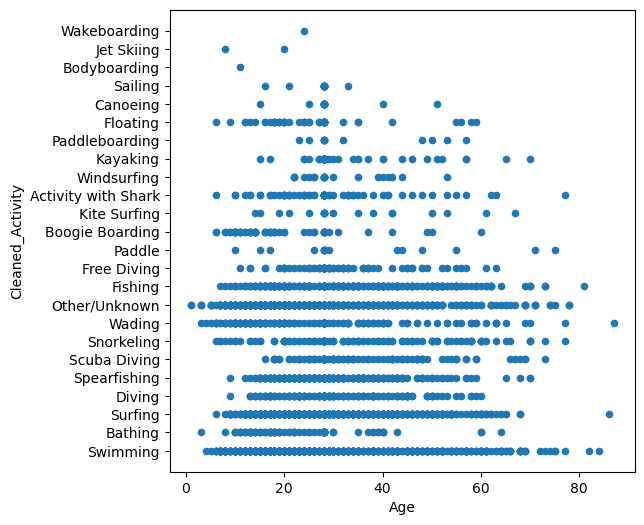

In [28]:
df.plot(kind='scatter', x='Age', y='Cleaned_Activity', figsize=(6,6))

In [ ]:
# I am graphicing here the Data & Age
fix, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df["Age"],
ax = ax, 
hist_kws = {"alpha": 0.6, "color": "#517AE9"}, 
kde=False, bins=20)
plt.xlabel("Age of the Victim in Years")
plt.ylabel("Count")
plt.title("Age Distribution")

In [ ]:
#sns.pairplot(df)
#plt.suptitle("Relationships between Age, Year and Original Order")

### Fatal Rate of Shark Attacks 

In [ ]:
df["Fatal"].unique()

In [ ]:
df["Fatal"] = df["Fatal"].fillna("Unknown").str.strip().astype(str)

In [ ]:
# Data Cleaning for The Column Fatal
df["Fatal"] = df["Fatal"].fillna("Unknown")
df["Fatal"] = df["Fatal"].str.strip()
df["Fatal"].value_counts(dropna=False)
df["Fatal"] = df["Fatal"].astype(str)
df["Fatal"] = df["Fatal"].replace({
    "Nan": "Unknown",
    " N": "NO",
    "UNKNOWN": "Unknown",
    "F": "Unknown",\
    "M": "NO",
    "n": "NO",
    "N": "NO",
    "Nq": "NO",
    "Y": "YES",
    2017: "Unknown",
    "2017 ": "Unknown",
     "Y x 2": "Yes",
     "y": "Yes",
     "N   ": "NO",
})
#df["Fatal"] = df["Fatal"]
#df["Fatal"] = df["Fatal"]
#df["Fatal"] = df["Fatal"]
df["Fatal"].unique()


In [ ]:
gender_grp = df.groupby("Fatal")
gender_grp.count()

#### Visualisation: Fatal Rate of Shark Attacks 

In [ ]:
# Plot Pie Chart Column and COunt of Occurrences 

# Grouping by Fatal Column and Count Occurrences 
fatal_counts = df["Fatal"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fatal_counts, labels=fatal_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Fatality Rate")
plt.show()

#### Fatality Rate by Gender

In [ ]:
# Group by gender and Fatality Rate
gender_fatal_counts = df.groupby(["Gender", "Fatal"]).size().unstack()

# Plot Stacked Bar Chart
gender_fatal_counts.plot(kind="bar", stacked=True, figsize=(4, 5))

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Fatality Rate by Gender")
plt.legend(title="Fatality", labels=gender_fatal_counts.columns)
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_count = df.groupby("Year")["Date"].count()
df_count

### Data Cleaning for the Column 'Date'

In [ ]:
df["Date"].value_counts()

#### Visualisation for Date

In [ ]:
df_count = df.groupby("Year")["Date"].count()
df_count[df_count.index > 1750].plot()

In [ ]:
df_count#.isna().sum()

In [ ]:
df["Country"].value_counts()

In [ ]:
df_usa = df[df["Country"] == "USA"]
df_usa

In [ ]:
#df_count = df.groupby("Country")["Year"].count()
#df_count[df_count.index > 1750].plot()

In [ ]:
#df["Date"] = pd.to_datetime(df["Date"]) # Converting Object to dfate 
set(df["Date"].sample(n=50))

In [ ]:
len(set(df["Date"])) # Too Many Values To go One by One.

In [ ]:
#df_usa["Date"].value_counts()

In [ ]:
#pd.to_datetime(df_usa["Data_Clean"])